# Project: Churn prediction for telecommunication business

# 1. Set Working Directory

In [1]:
import os

os.chdir('S:\Data Science Projects\Data-Science-Projects\Telecom-Churn-Analysis')

# 2. Import Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# 3. Import Data

In [3]:
# Import train dataset

df_train = pd.read_csv('churnTrain.csv')

df_train.head(2)

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,...,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [4]:
df_train.shape

(3333, 21)

In [5]:
# Import test dataset

df_test = pd.read_csv('churnTest.csv')

df_test.head(2)

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls
0,HI,101.0,510.0,3548815,no,no,0,70.9,123.0,12.05,211.9,73.0,18.01,236.0,73.0,10.62,10.6,3.0,2.86,3
1,MT,137.0,510.0,3817211,no,no,0,223.6,86.0,38.01,244.8,139.0,20.81,94.2,81.0,4.24,9.5,7.0,2.57,0


In [6]:
df_test.shape

(425, 20)

# 4. Data Exploration

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State                  3333 non-null object
Account_Length         3333 non-null int64
Area_Code              3333 non-null int64
Phone_No               3333 non-null int64
International_Plan     3333 non-null object
Voice_Mail_Plan        3333 non-null object
No_Vmail_Messages      3333 non-null int64
Total_Day_minutes      3333 non-null float64
Total_Day_Calls        3333 non-null int64
Total_Day_charge       3333 non-null float64
Total_Eve_Minutes      3333 non-null float64
Total_Eve_Calls        3333 non-null int64
Total_Eve_Charge       3333 non-null float64
Total_Night_Minutes    3333 non-null float64
Total_Night_Calls      3333 non-null int64
Total_Night_Charge     3333 non-null float64
Total_Intl_Minutes     3333 non-null float64
Total_Intl_Calls       3333 non-null int64
Total_Intl_Charge      3333 non-null float64
No_CS_Calls            3333 non-null int64
Churn         

In [8]:
# Check for Null Values

df_train.isna().sum()

State                  0
Account_Length         0
Area_Code              0
Phone_No               0
International_Plan     0
Voice_Mail_Plan        0
No_Vmail_Messages      0
Total_Day_minutes      0
Total_Day_Calls        0
Total_Day_charge       0
Total_Eve_Minutes      0
Total_Eve_Calls        0
Total_Eve_Charge       0
Total_Night_Minutes    0
Total_Night_Calls      0
Total_Night_Charge     0
Total_Intl_Minutes     0
Total_Intl_Calls       0
Total_Intl_Charge      0
No_CS_Calls            0
Churn                  0
dtype: int64

No null values in any columns

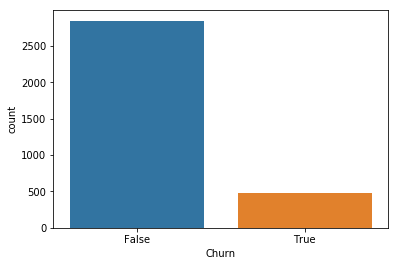

In [9]:
ax = sns.countplot(x="Churn", data=df_train)

In [10]:
df_train.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

### Converting categorical variable to binary

In [11]:
df_train['Churn'] = df_train['Churn'].astype(str)

df_train['Churn'] = np.where(df_train['Churn']=="True", 1, 0)

df_train['International_Plan'] = df_train['International_Plan'].str.strip()

df_train['International_Plan'] = np.where(df_train['International_Plan']=="yes", 1, 0)

df_train['Voice_Mail_Plan'] = df_train['Voice_Mail_Plan'].str.strip()

df_train['Voice_Mail_Plan'] = np.where(df_train['Voice_Mail_Plan']=="yes", 1, 0)

df_train.head(2)

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,...,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
0,KS,128,415,3824657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,3717191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


### State-wise churn count

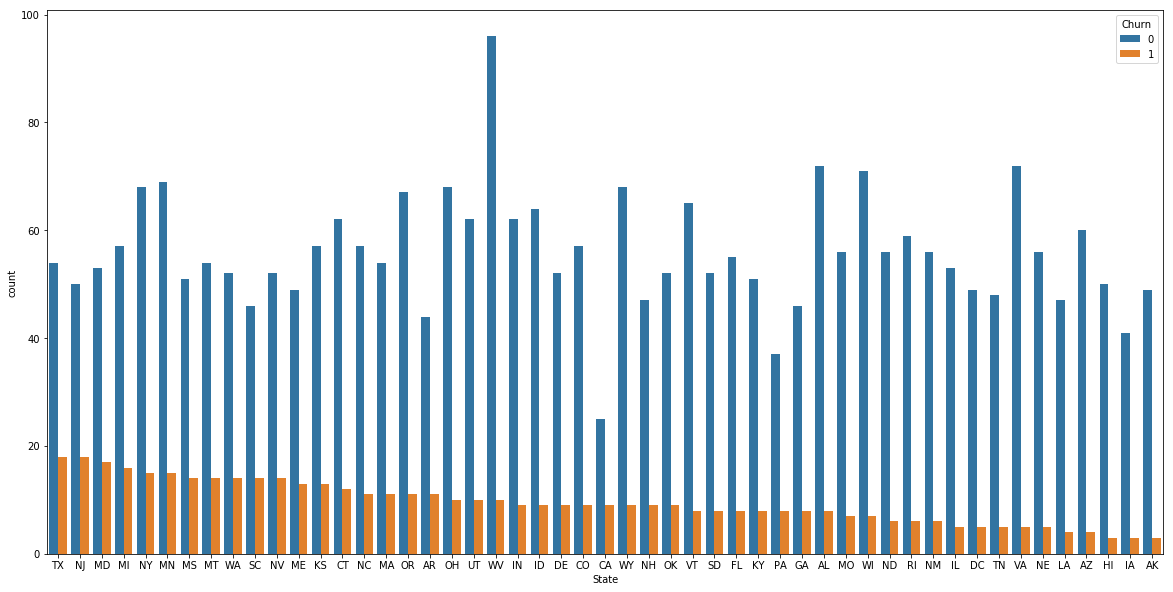

In [12]:
# Plotting state-wise churned users

fig, ax = plt.subplots(figsize=(20, 10))

order = df_train.groupby(['State']).sum()['Churn'].sort_values(ascending=False).index.values

ax = sns.countplot(x="State", hue="Churn", data=df_train, order=order)

From above plot, State TX has highest churned user and AK has least churned users

In [13]:
# Keeping only continuous and binary features

# Dropping State, Account_Length, Area_Code, Phone_No

df_train.drop(columns=['State', 'Account_Length', 'Area_Code', 'Phone_No'], inplace=True)

### Correlation matrix & Correlation Heat-map

In [14]:
corr_matrix = df_train.corr()
corr_matrix

,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
International_Plan,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
Voice_Mail_Plan,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
No_Vmail_Messages,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total_Day_minutes,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total_Day_Calls,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total_Day_charge,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total_Eve_Minutes,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total_Eve_Calls,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total_Eve_Charge,0.019106,0.021559,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total_Night_Minutes,-0.028905,0.006079,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


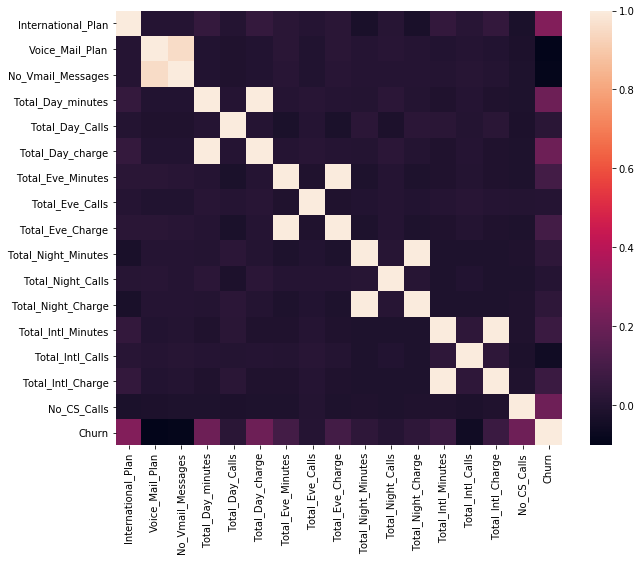

In [15]:
plt.figure(figsize = (10,8))

sns.heatmap(corr_matrix)
plt.show()

### Conclusion: From above correlation matrix, variables Total_Day_minutes, Total_Eve_Minutes, Total_Night_Minutes, Total_Intl_Minutes look to be highly correlated between themselves, hence omotting them

In [16]:
# Dropping features, Total_Day_minutes, Total_Eve_Minutes, Total_Night_Minutes, Total_Intl_Minutes due to high collinearity

df_train.drop(columns=['Total_Day_minutes', 'Total_Eve_Minutes', 'Total_Night_Minutes', 'Total_Intl_Minutes', 'No_Vmail_Messages'], inplace=True)

# 5. Modelling

## 5.1 Logistic Regression

In [17]:
# Separate the Feature and Target Variables

X_train = df_train.loc[:, df_train.columns != 'Churn']

y_train = df_train['Churn']

In [18]:
# Modelling

X_train = sm.add_constant(X_train)

log_reg = sm.Logit(y_train, X_train).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.324624
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3321
Method:                           MLE   Df Model:                           11
Date:                Tue, 02 Mar 2021   Pseudo R-squ.:                  0.2155
Time:                        20:01:29   Log-Likelihood:                -1082.0
converged:                       True   LL-Null:                       -1379.1
                                        LLR p-value:                2.266e-120
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.5299      0.708    -12.044      0.000      -9.918      -7.142
Inter

### Conclusion 1: From above summary, we see that for telecommunication business, features like International_Plan, Total_Intl_Charge & No_CS_Calls have significant effect on customer attrition.

### Conclusion 2: Also features like Total_Day_Calls, Total_Eve_Calls & Total_Night_Calls look to be insignificant with high p-values, hence omitting them and rerunning the Logistic Regression Model

In [19]:
# removing the features with high p-values, 

df_train.drop(columns=['Total_Day_Calls', 'Total_Eve_Calls', 'Total_Night_Calls'], inplace=True)

In [20]:
# Separate the Feature and Target Variables for Train set

X_train = df_train.loc[:, df_train.columns != 'Churn']

y_train = df_train['Churn']

In [21]:
# Modelling

X_train = sm.add_constant(X_train)

log_reg = sm.Logit(y_train, X_train).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.324861
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3324
Method:                           MLE   Df Model:                            8
Date:                Tue, 02 Mar 2021   Pseudo R-squ.:                  0.2149
Time:                        20:01:29   Log-Likelihood:                -1082.8
converged:                       True   LL-Null:                       -1379.1
                                        LLR p-value:                8.377e-123
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.0489      0.514    -15.649      0.000      -9.057      -7.041
Inter

### Conclusion: From above summary, the model still identifies the same features like International_Plan, Total_Intl_Charge & No_CS_Calls to have significant effect on Churn variable.

In [22]:
# Separate the Feature and Target Variables for Test set

X_test = df_test[['International_Plan', 'Voice_Mail_Plan', 'Total_Day_charge', 'Total_Eve_Charge', 'Total_Night_Charge',
                  'Total_Intl_Calls', 'Total_Intl_Charge', 'No_CS_Calls']]

X_test = sm.add_constant(X_test)

# Prediction

y_pred = log_reg.predict(X_test)

TypeError: can't multiply sequence by non-int of type 'float'

In [23]:
X_test[X_test.isna().any(axis=1)]

,const,International_Plan,Voice_Mail_Plan,Total_Day_charge,Total_Eve_Charge,Total_Night_Charge,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls
7,1.0,no,NaN,26.78,19.08,13.99,6.0,3.00,0
12,1.0,NaN,NaN,NaN,13.26,10.26,9.0,2.86,1
16,1.0,no,yes,19.18,NaN,8.77,3.0,3.86,1
17,1.0,no,NaN,38.30,19.38,11.44,3.0,3.16,1
19,1.0,NaN,no,32.86,17.69,10.26,9.0,1.92,1
23,1.0,NaN,yes,NaN,19.84,7.84,3.0,2.97,2
38,1.0,no,no,28.25,23.75,NaN,6.0,3.62,1
39,1.0,yes,NaN,26.98,13.23,11.07,1.0,2.24,2
42,1.0,no,yes,28.63,15.73,NaN,4.0,2.97,2
43,1.0,NaN,no,NaN,11.78,17.17,4.0,2.75,2


In [24]:
X_test.isna().sum()

const                  0
International_Plan     5
Voice_Mail_Plan        4
Total_Day_charge      11
Total_Eve_Charge       5
Total_Night_Charge     4
Total_Intl_Calls       5
Total_Intl_Charge      0
No_CS_Calls            0
dtype: int64

In [25]:
X_test['International_Plan'].value_counts()

 no     380
 yes     40
Name: International_Plan, dtype: int64

In [26]:
X_test['Voice_Mail_Plan'].value_counts()

 no     315
 yes    106
Name: Voice_Mail_Plan, dtype: int64

In [27]:
X_train.isna().sum()

const                 0
International_Plan    0
Voice_Mail_Plan       0
Total_Day_charge      0
Total_Eve_Charge      0
Total_Night_Charge    0
Total_Intl_Calls      0
Total_Intl_Charge     0
No_CS_Calls           0
dtype: int64